In [12]:
import os

In [13]:
os.getcwd()

'/content'

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
## if it is a gray scale or color
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # This works on your local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is on your colab
    cv2_imshow(img)
    return img


In [16]:
img_path = "cat.jpg"

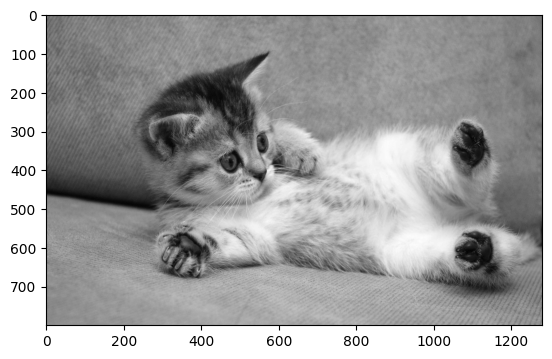

In [17]:
cat = read_img(path=img_path, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



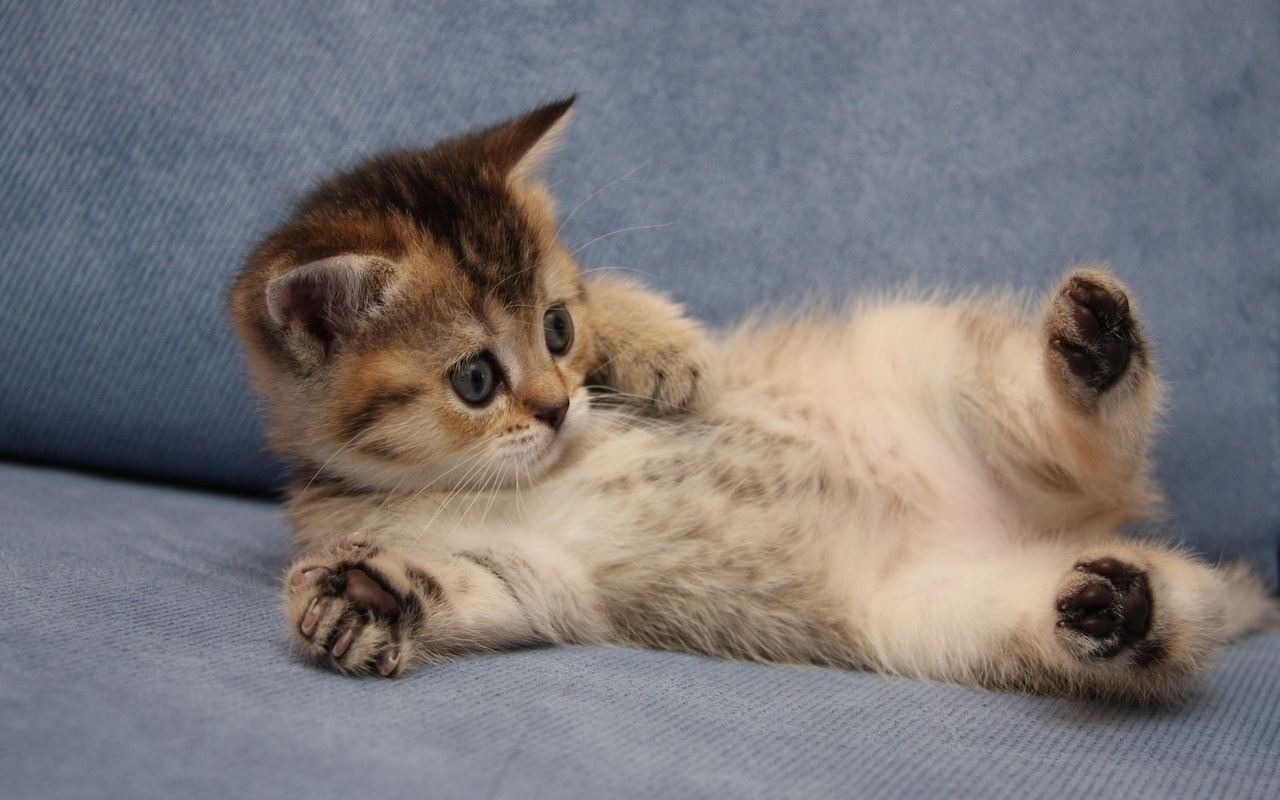

In [20]:
color_cat = read_img(path=img_path, grayscale=False)


In [19]:
cat.shape

(800, 1280)

In [21]:
color_cat.shape


(800, 1280, 3)

# apply a single conv layer

In [22]:
row, col = cat.shape
batch = 1 # single image is there
ch = 1 # grayscale
reshaped_cat_img = cat.reshape(batch, row, col, ch)
reshaped_cat_img.shape

(1, 800, 1280, 1)

In [23]:
input_shape = reshaped_cat_img.shape[1:]  ##[1:] is to pass only (800, 1280, 1) keeping batch as none for now

CONV_LAYER = [

    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 798, 1278, 1)      10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
##3x3 is the image size + 1 is bias = 10 parameters
3*3 + 1

10

In [35]:
out = conv_model.predict(reshaped_cat_img)

1/1 [==============================] - 0s 18ms/step


In [36]:
out.shape

(1, 798, 1278, 1)

In [29]:
#calculation of width
(168 - 3 + 2*(0))//1 + 1

166

In [30]:
#calculation of height
(300 - 3 + 2*(0))//1 + 1

298

In [34]:
## for predicting you just need width and height (166, 298) not the whole reshape batch aas (1, 166, 298, 1)
row, col = out.shape[1:-1]
row, col

(798, 1278)

In [32]:
_, row, col, _ = out.shape
row, col

(798, 1278)

In [33]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(798, 1278)

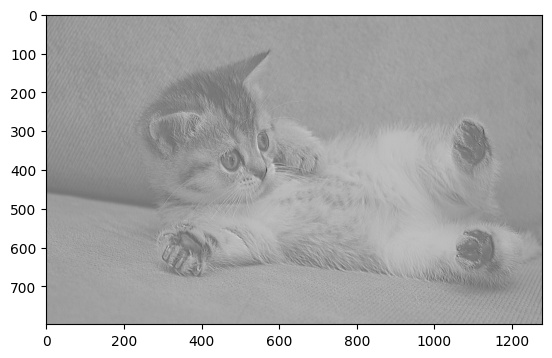

In [37]:
plt.imshow(reshape_out, cmap="gray")

# For color image

In [38]:
color_cat.shape

(800, 1280, 3)

In [41]:
# (1, r, c, ch)
row,col,ch = color_cat.shape
color_cat_reshaped = color_cat.reshape(1, row,col,ch)
color_cat_reshaped.shape

(1, 800, 1280, 3)

In [42]:
input_shape = color_cat_reshaped.shape[1:]

CONV_LAYER = [

    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 798, 1278, 1)      28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
## now 3x3 has a 3 channel as well in color and 1 bias
3*3*3 + 1

28

In [44]:
out = conv_model.predict(color_cat_reshaped)

1/1 [==============================] - 0s 232ms/step


In [45]:
out.shape

(1, 798, 1278, 1)

In [47]:
#width
(800- 3 + 2*0)//1 + 1

798

In [48]:
#height
(800 - 3 + 2*0)//1 + 1

798

In [49]:
_, row, col, _ = out.shape
row, col

(798, 1278)

In [50]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(798, 1278)

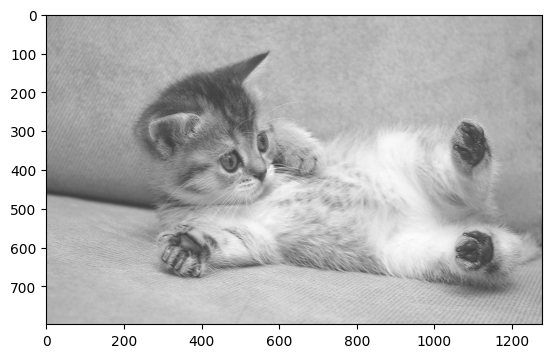

In [51]:
plt.imshow(reshape_out, cmap="gray")

# **FILTER**

using **5 filters**:

In [52]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [53]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):

  CONV_LAYER = [

      tf.keras.layers.Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          strides=strides,
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [54]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



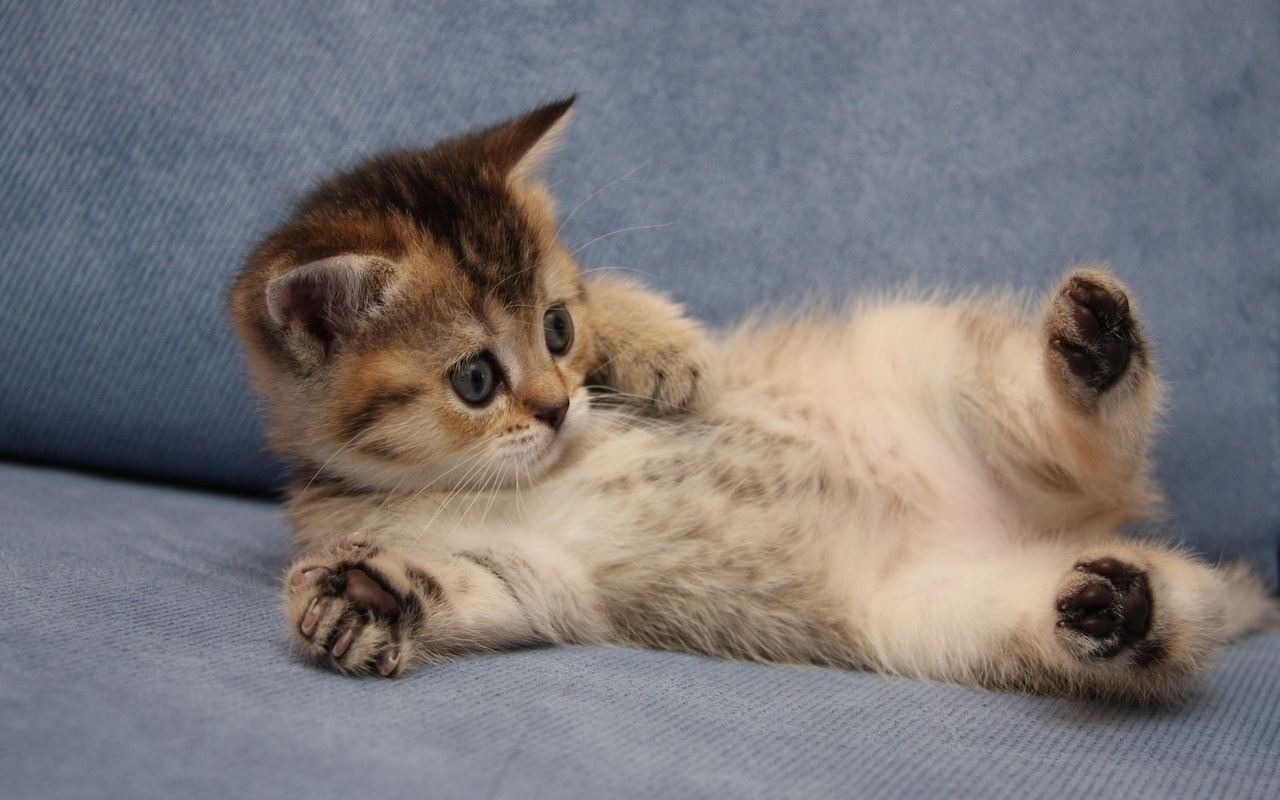

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 798, 1278, 1)      28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 59ms/step
(1, 798, 1278, 1)


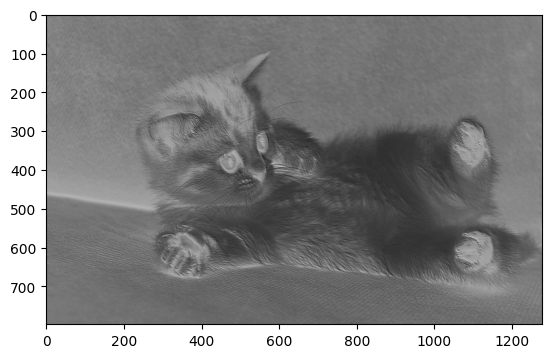

In [55]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Now using **5 filters** on **color Image**

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



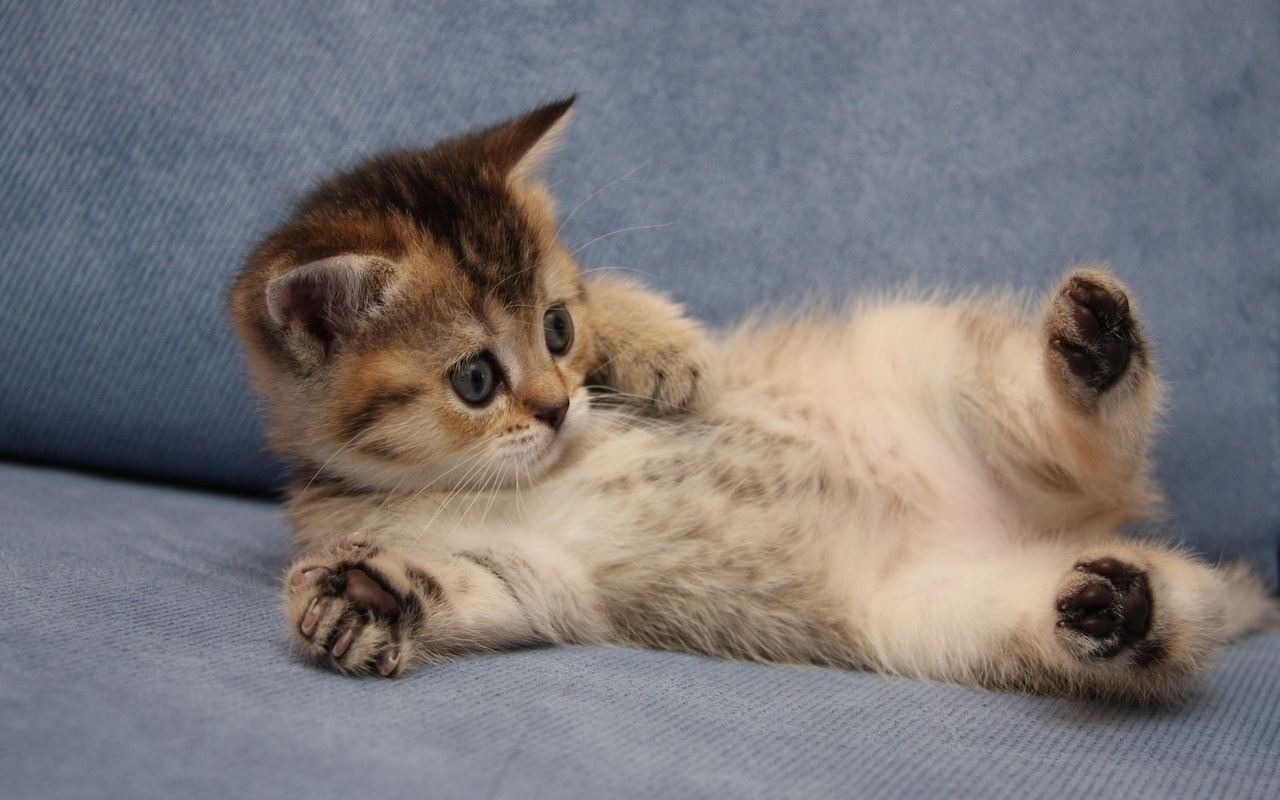

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 798, 1278, 5)      140       
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 136ms/step
(1, 798, 1278, 5)


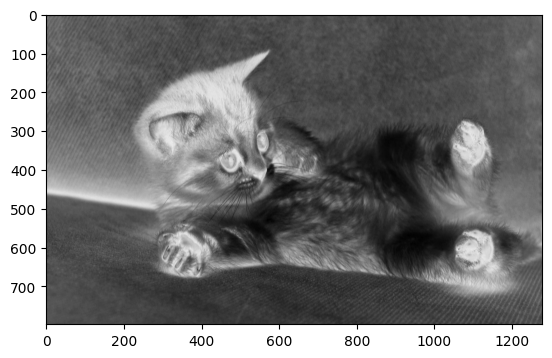

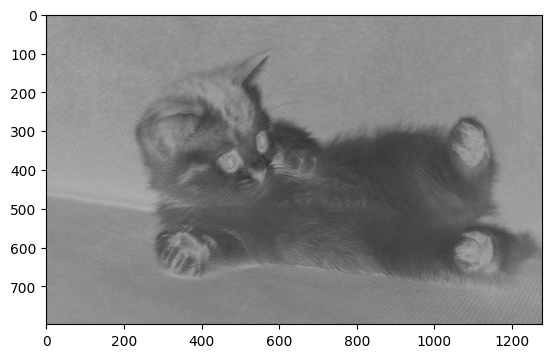

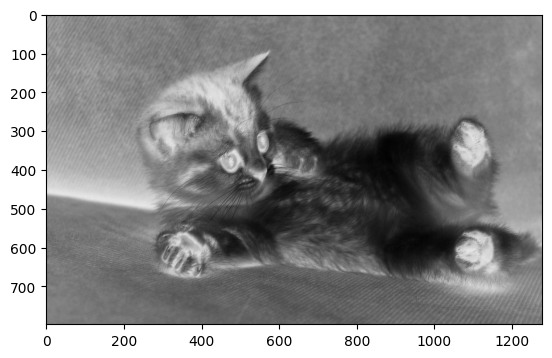

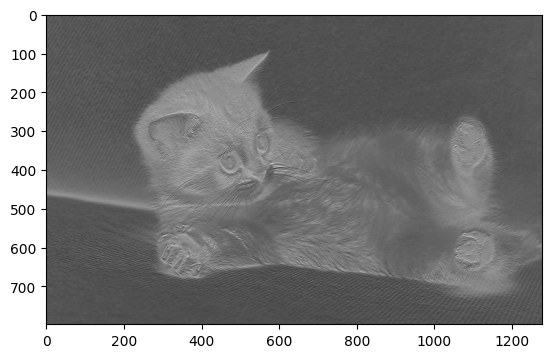

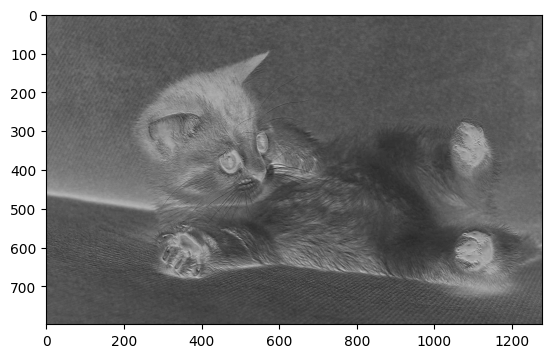

In [56]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [57]:
28*5

140

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 798, 1278, 1)      10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 44ms/step
(1, 798, 1278, 1)


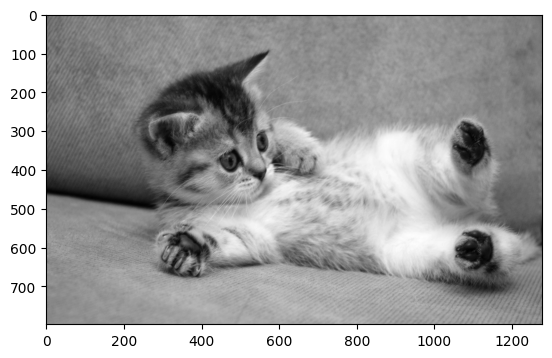

In [58]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=1,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Now using **5 filters** on **Gray Image**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 798, 1278, 5)      50        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 106ms/step
(1, 798, 1278, 5)


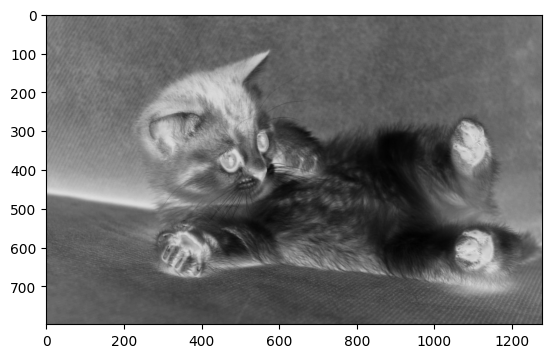

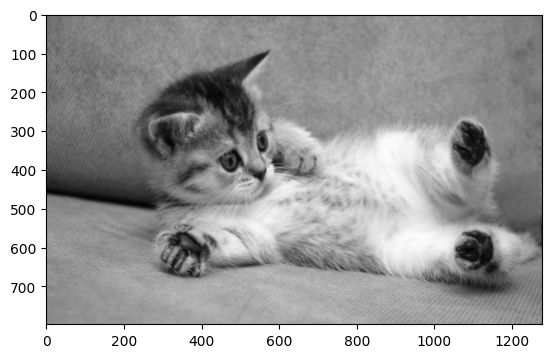

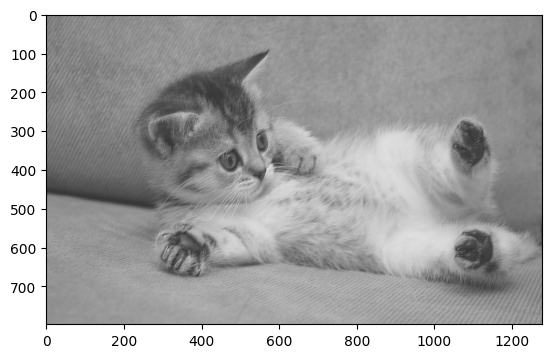

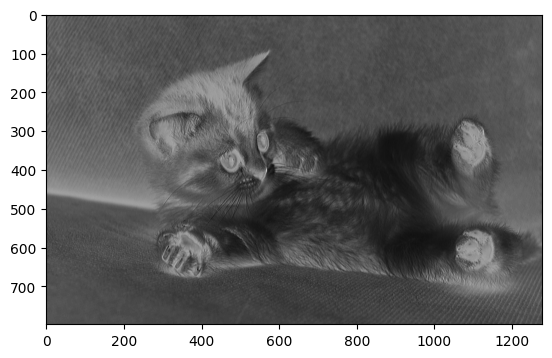

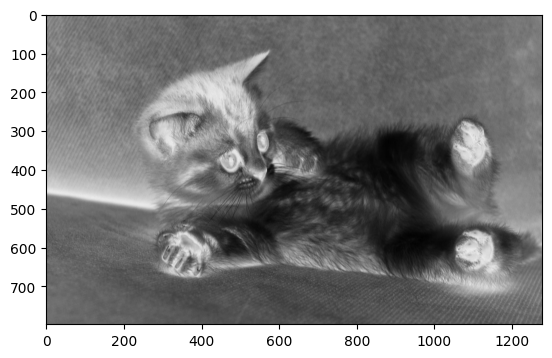

In [59]:
## 5 ouputs for 5 filters carrying different features
## this is with Grayscale i.e grayscale = True
img = read_img(img_path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=5,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

# **MAXPOOLING**

In [60]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides=strides)

  result = pooling_layer(reshaped_img)
  return result

(800, 1280)


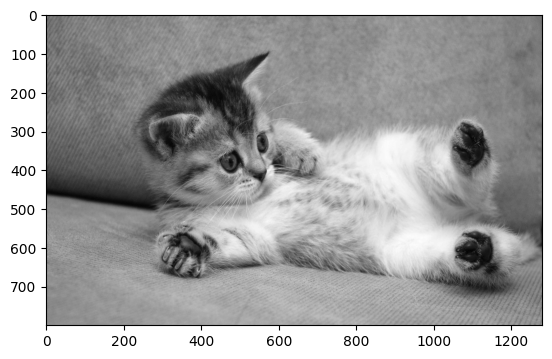

In [61]:
img = read_img(img_path)
print(img.shape)

In [62]:
result = max_pooling(img)
print(result.shape)

(1, 400, 640, 1)


In [63]:
#height
(800 - 2)//2 + 1

400

In [65]:
## width
(1280 - 2)//2 + 1

640

In [66]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

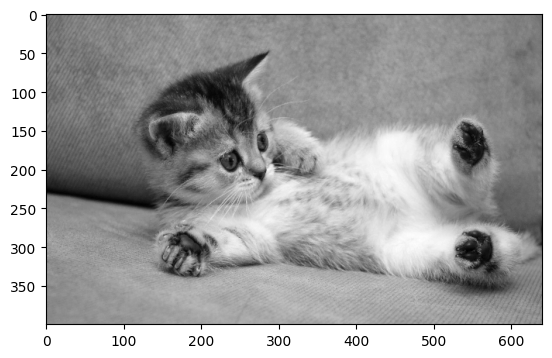

In [67]:
plot_pooling(result)

In [68]:
_, row, col, _ = result.shape

reshape = tf.reshape(result, (row, col))

pooling once again

In [69]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 200, 320, 1])

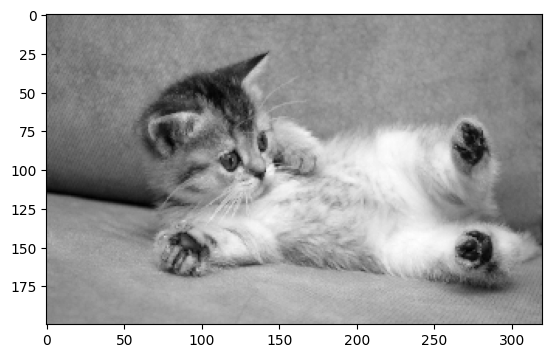

In [70]:
plot_pooling(result)